In [4]:
import pandas as pd
import numpy as np

df_resultados = pd.read_csv('drive/MyDrive/Predicciones/Resultados.csv')
resultados2013 =df_resultados[df_resultados.Año > 2012]
resultados1 = resultados2013[['Pos_Inact_Inicial', 'Pos_Inact_Final', 'Removidos', 'Reactivos', 'FFVV_inicial', 'FFVV_final', 'Old Actives', 'Activos', 'No_activos', 'Reclutados', 'Inscritos']][resultados2013.reclutamiento == 1]

In [23]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

##Clasificadores y Redes Neuronales Artificiales

In [16]:
X = resultados1[['FFVV_final','Activos']]
Y = resultados1['Reclutados']

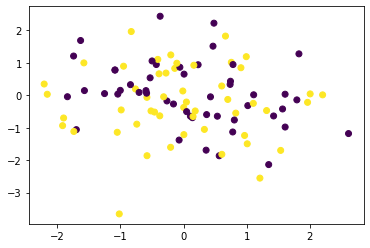

In [17]:
X, Y = make_classification(n_samples=100, n_classes=2, n_features=10)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4)

In [25]:
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(Y_test, Y_pred):
    resultado = confusion_matrix(Y_test, Y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

###Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 800)
RandomForest.fit(X_train, Y_train)
Y_pred_rfc = RandomForest.predict(X_test)

In [27]:
evaluar(Y_test, Y_pred_rfc)

[[18  1]
 [ 1 20]]
True positives: 20
True negatives: 18
False positives: 1
False negative: 1
Precision:95.0%
Sensibilidad:95.23809523809523%
Especificidad:94.73684210526315%


###Redes Neuronales Artificiales

In [28]:
from sklearn.neural_network import MLPClassifier
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10,4),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-8)

NeuralNetwork.fit(X_train, Y_train)
Y_pred_nn = NeuralNetwork.predict(X_test)

In [29]:
evaluar(Y_test, Y_pred_nn)

[[18  1]
 [ 4 17]]
True positives: 17
True negatives: 18
False positives: 1
False negative: 4
Precision:87.5%
Sensibilidad:80.95238095238095%
Especificidad:94.73684210526315%


###Support Vector Machine

In [30]:
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.pipeline import make_pipeline

SupportVectorMachine = SVC()
SupportVectorMachine.fit(X_train, Y_train) 
Y_pred_svm = SupportVectorMachine.predict(X_test) 

In [31]:
evaluar(Y_test, Y_pred_svm)

[[18  1]
 [ 4 17]]
True positives: 17
True negatives: 18
False positives: 1
False negative: 4
Precision:87.5%
Sensibilidad:80.95238095238095%
Especificidad:94.73684210526315%
